In [16]:
#YOLOv8整合至ultralytics並透過該框架就能夠進行YOLO系列相關操作
!pip install ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [17]:
from ultralytics import YOLO

from IPython.display import display, Image

In [18]:
#有關於Dataset建置部分可以參考下方文章進行自定義資料收集
#影像處理Roboflow使用教學參考來源:https://www.wpgdadatong.com/blog/detail/71282
#創建資料集位置並透過API進行引用,API KEY部分登入帳號進行操作將會自行產生
!mkdir /content/datasets
%cd /content/datasets

#====================Export Dateset=========================
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="r9BpcvphquT6EPGSuIGB")
project = rf.workspace("school-jxfxc").project("spongebob-patrick")
dataset = project.version(5).download("yolov8")
#====================Export Dateset=========================

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Spongebob-Patrick-5 in yolov8:: 100%|██████████| 458/458 [00:00<00:00, 1809.15it/s]


In [19]:
%cd /content
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Spongebob-Patrick-5/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dy

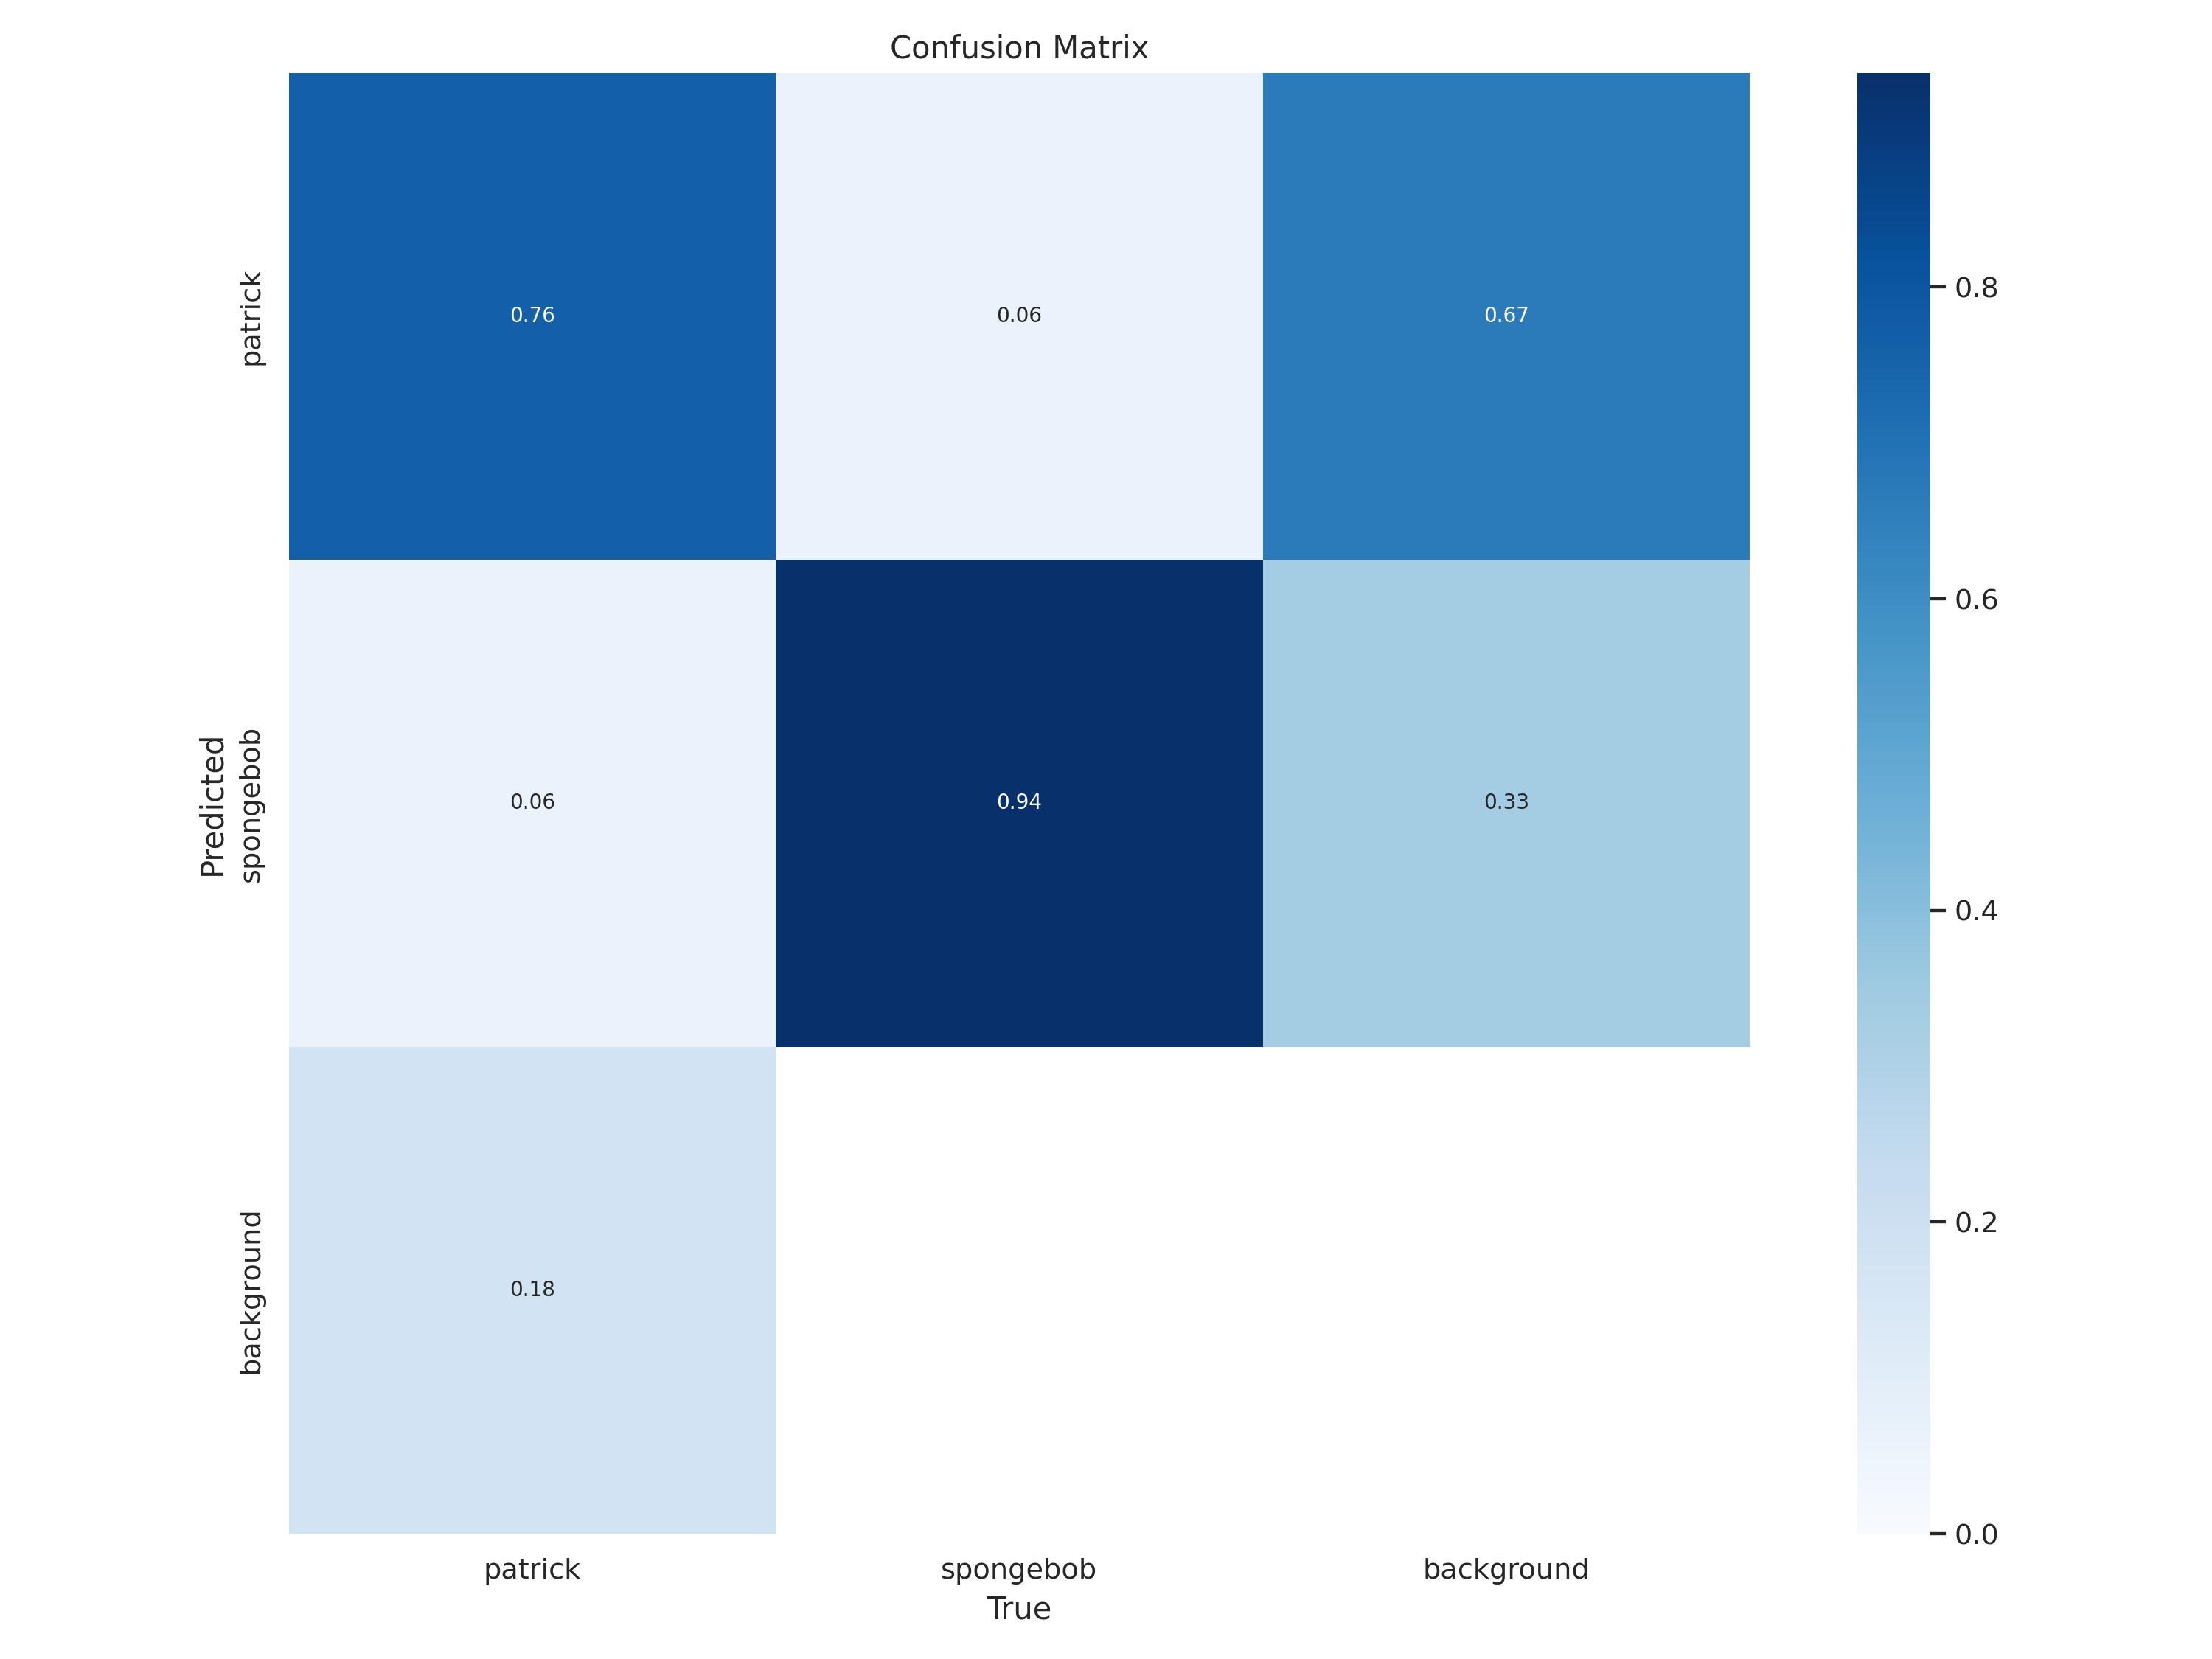

In [20]:
#模型訓練confusion matrix可視化
Image (filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

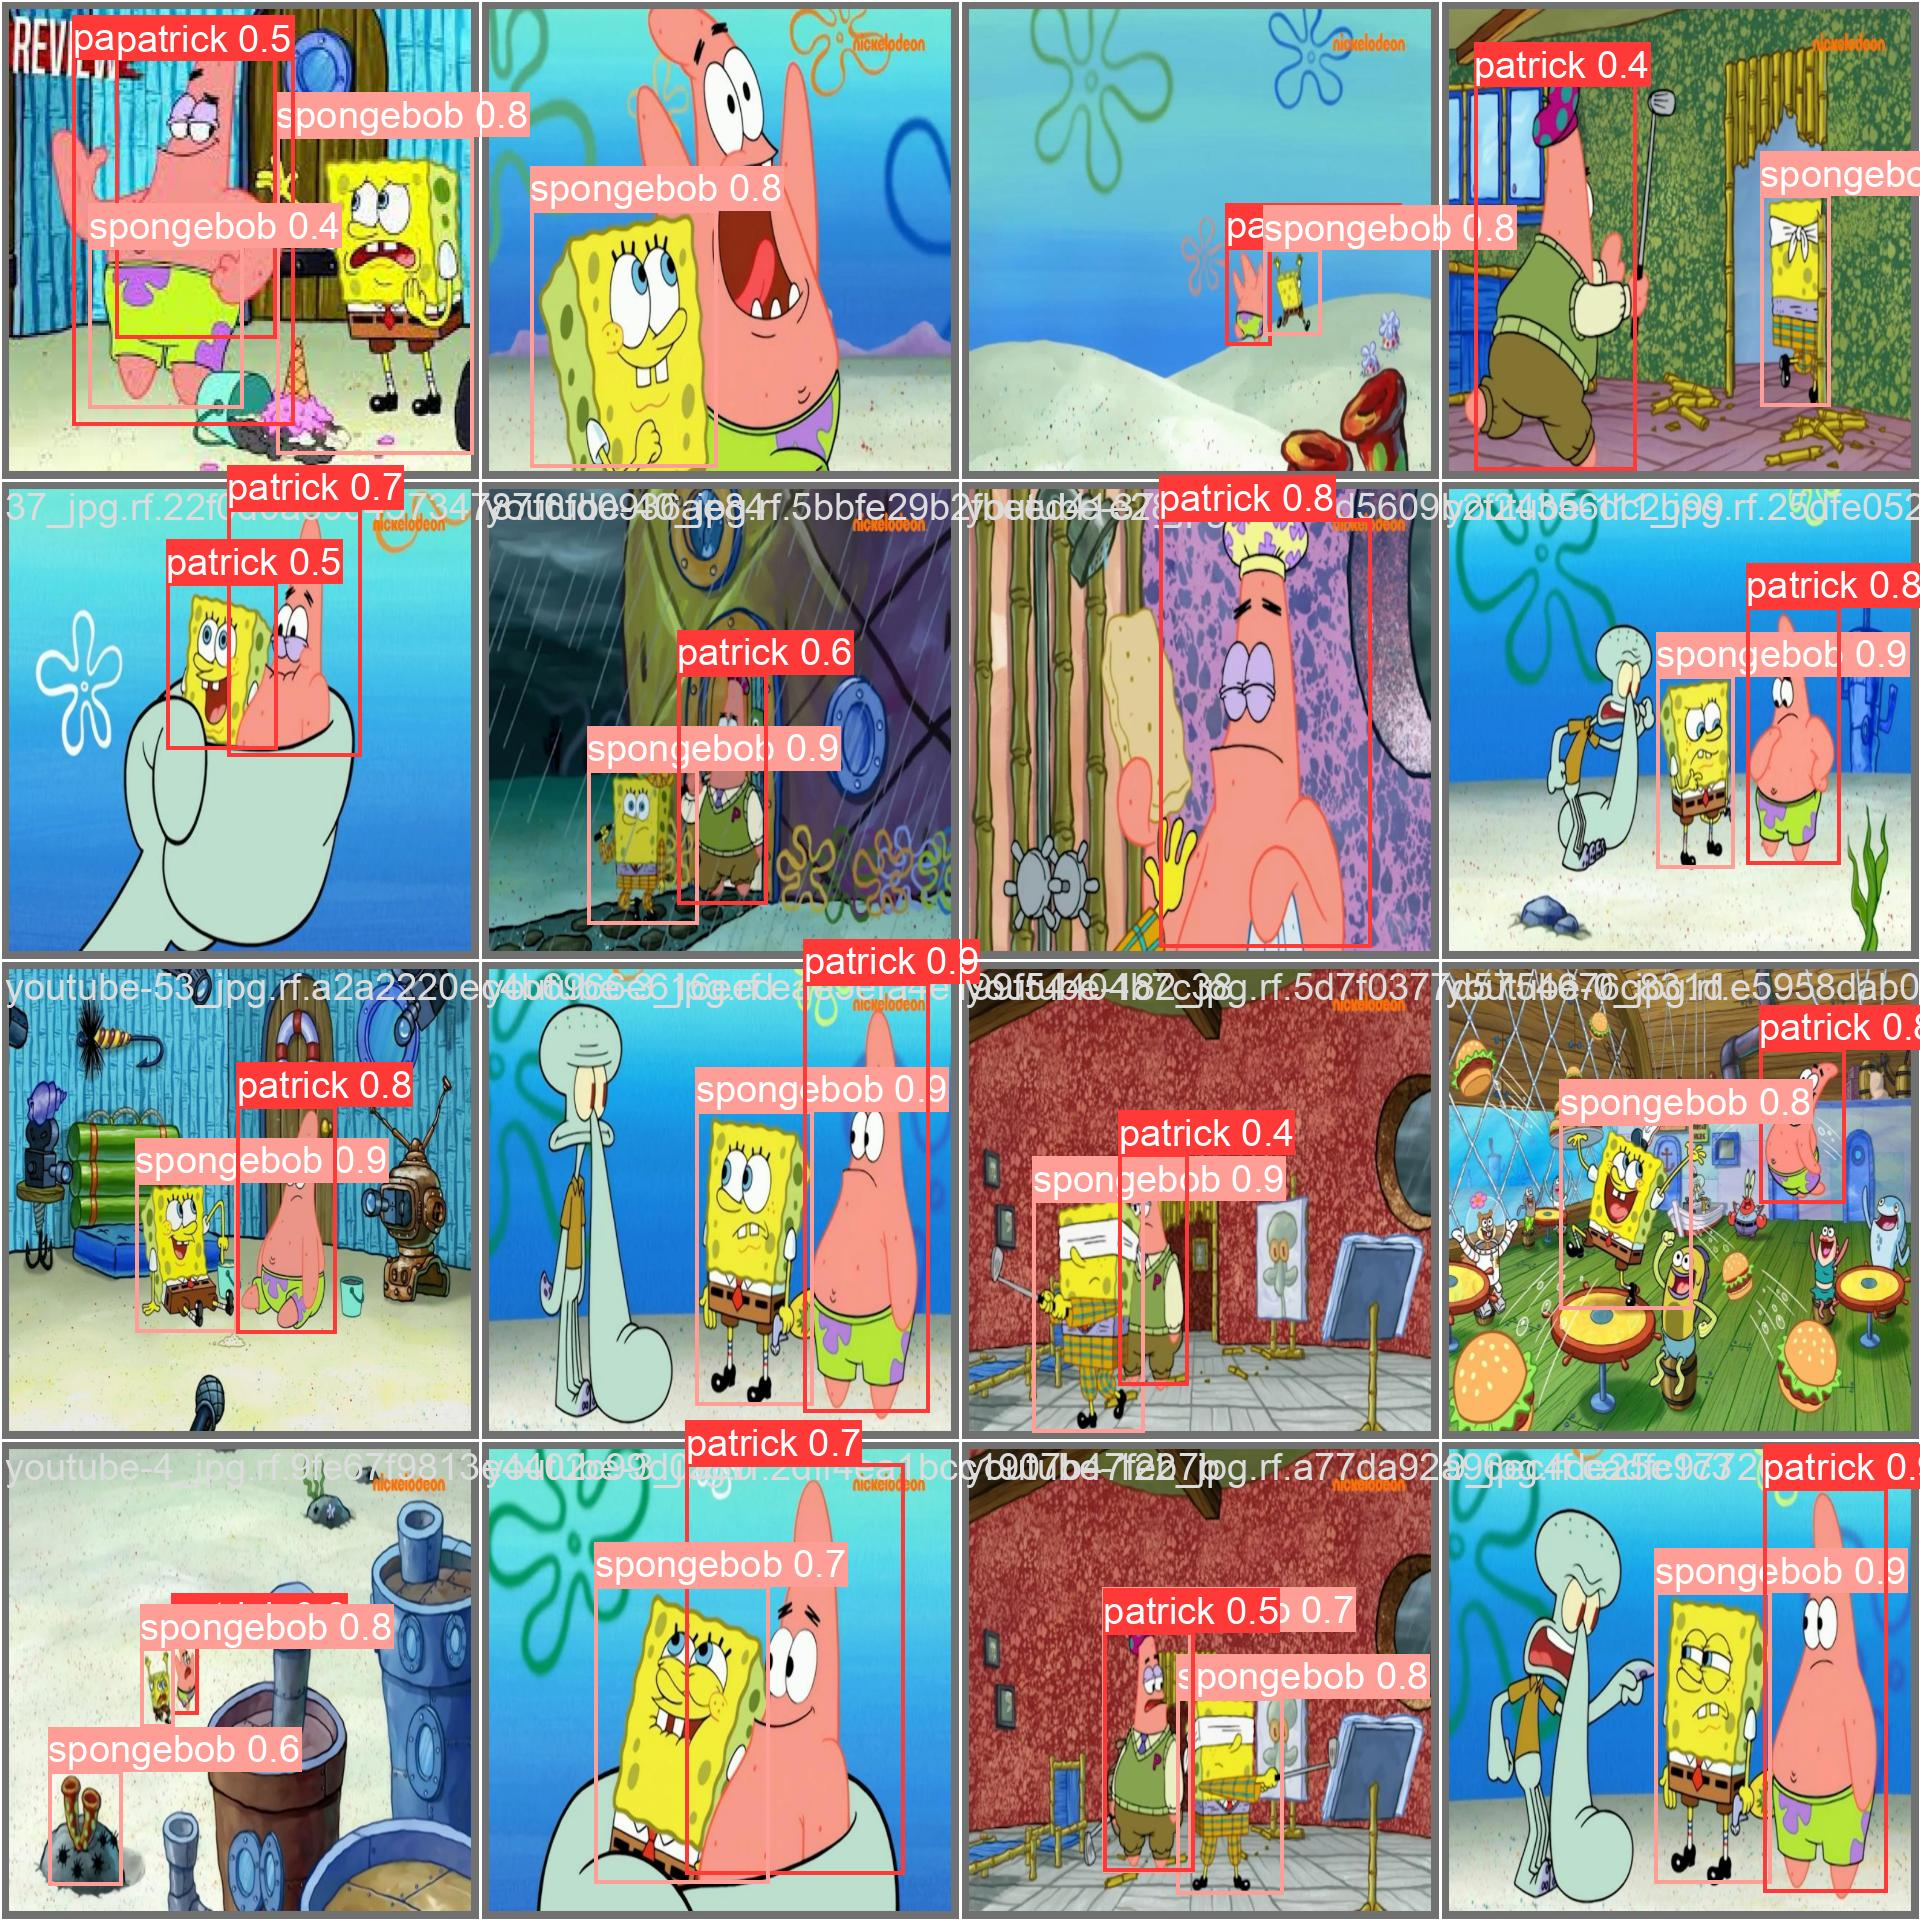

In [21]:
#模型訓練結果可視化
Image (filename=f'/content/runs/detect/train3/val_batch0_pred.jpg', width=600)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict3


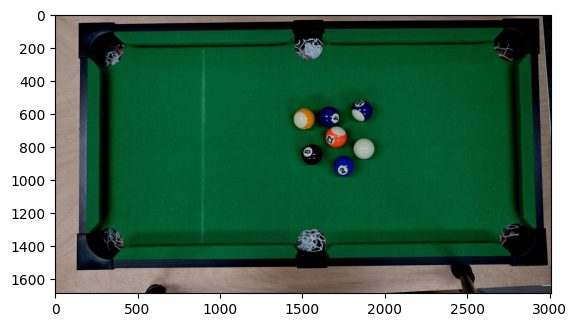

In [22]:
import os
import matplotlib.pyplot as plt

# Load a model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Predict with the model
results = model.predict(source="/content/bk.jpg",save=True)#用自己上傳的圖片測試

img = plt.imread('/content/runs/detect/predict/bk.jpg')
plt.imshow(img)